# Normalization

**Import**

In [27]:
# from second tutorial notebook (Part02)
import scanpy as sc
import pandas as pd
import scvelo as scv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import ipywidgets as widgets

# others
import re
import os

# first tutorial
import bbknn
import diffxpy.api as dxpy
import plotly.express as px

**Read anndata matrix**

In [28]:
path_out = f'/home/astridkd/testis_singlecell/Workspaces/adahl/birc-project-akd/data/mapping/MAC/adata/'

adata_out_mm = f'{path_out}/preproc_1_starsolo_multimap_mac.h5ad'

In [29]:
# open saved data
adata = sc.read(adata_out_mm)

In [30]:
adata

AnnData object with n_obs × n_vars = 7770 × 24717
    obs: 'DATASET', 'batch', 'total_counts', 'n_genes_by_counts', 'percent_mito', 'prop_unspl', 'prop_spl', 'perc_MALAT1', 'n_genes', 'doublet_scores', 'predicted_doublets'
    var: 'gene_ids', 'feature_types', 'chromosome', 'n_cells'
    layers: 'raw_counts', 'spliced', 'unspliced'

In [31]:
cd '/home/astridkd/testis_singlecell/Workspaces/adahl/birc-project-akd/tutorial/'

/faststorage/project/testis_singlecell/Workspaces/adahl/birc-project-akd/tutorial


In [32]:
%run Scripts/pythonScripts.py

In [1]:
palette_dict = {"Elongated_spermatids":'#0173B2',"Round_spermatids":'#FF7C00',"Spermatocytes":"green","Spermatogonia":"red"}

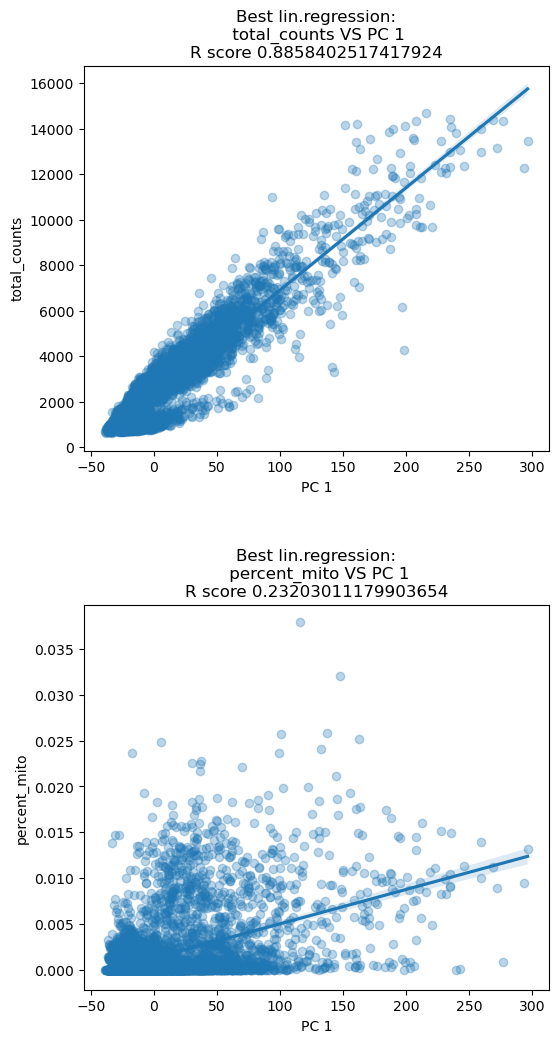

In [33]:
#from pythonScripts import dependentFeatures

#PCA on unnormalized data
sc.preprocessing.pca(adata, svd_solver='arpack', random_state=12345)
#Calculating correlations
dependentFeatures(adata=adata, obs_subset=['total_counts','percent_mito'])

The biggest variation in the data at this point is explained by total UMI count. Normalizing with TPM should remove this bias.

In [34]:
adata.var['n_cells']

LOC100996442    491
LOC112268260    239
LOC105378947     65
LOC100288069    280
LINC01409       167
               ... 
ND3              87
ND4             626
ND5             251
ND6              61
CYTB            498
Name: n_cells, Length: 24717, dtype: int64

In [35]:
adata.var['chromosome']

LOC100996442     1
LOC112268260     1
LOC105378947     1
LOC100288069     1
LINC01409        1
                ..
ND3             MT
ND4             MT
ND5             MT
ND6             MT
CYTB            MT
Name: chromosome, Length: 24717, dtype: category
Categories (26, object): ['1', '2', '3', '4', ..., 'MT', 'Un', 'X', 'Y']

In [36]:
adata.obs.head()

DATASET batch  total_counts  n_genes_by_counts  \
SN116_AAACCTGCACCGGAAA   SN116     0   1582.000000               1450   
SN116_AAACCTGCAGACGCCT   SN116     0   2672.000000               2160   
SN116_AAACCTGGTCCCGACA   SN116     0   2255.000000               1901   
SN116_AAACCTGGTCTCAACA   SN116     0   2002.500000               1712   
SN116_AAACCTGTCGGCGCAT   SN116     0   1472.666626               1348   

                        percent_mito  prop_unspl  prop_spl  perc_MALAT1  \
SN116_AAACCTGCACCGGAAA      0.000000    0.760000  0.240000     0.001264   
SN116_AAACCTGCAGACGCCT      0.000000    0.508545  0.491455     0.001497   
SN116_AAACCTGGTCCCGACA      0.001774    0.521601  0.478399     0.003548   
SN116_AAACCTGGTCTCAACA      0.000000    0.771748  0.228252     0.002996   
SN116_AAACCTGTCGGCGCAT      0.000000    0.780639  0.219361     0.002716   

                        n_genes  doublet_scores  predicted_doublets  
SN116_AAACCTGCACCGGAAA     1450        0.015877               False  
SN116_AAACCTGCAGACGCCT     2160        0.034145               False  
SN116_AAACCTGGTCCCGACA     1901        0.040484               False  
SN116_AAACCTGGTCTCAACA     1712        0.013447               False  
SN116_AAACCTGTCGGCGCAT     1348        0.018012               False

In [37]:
# TPM normalization. 
sc.pp.normalize_per_cell(adata)

In [38]:
# matrix logarithmization (ln(x+1))
sc.pp.log1p(adata)

In [39]:
# to see counts
adata.to_df()

LOC100996442  LOC112268260  LOC105378947  \
SN116_AAACCTGCACCGGAAA           0.0           0.0           0.0   
SN116_AAACCTGCAGACGCCT           0.0           0.0           0.0   
SN116_AAACCTGGTCCCGACA           0.0           0.0           0.0   
SN116_AAACCTGGTCTCAACA           0.0           0.0           0.0   
SN116_AAACCTGTCGGCGCAT           0.0           0.0           0.0   
...                              ...           ...           ...   
SN143_TTTGTCACATGCCTTC           0.0           0.0           0.0   
SN143_TTTGTCAGTGCAACGA           0.0           0.0           0.0   
SN143_TTTGTCAGTGCAGTAG           0.0           0.0           0.0   
SN143_TTTGTCATCTCTGTCG           0.0           0.0           0.0   
SN143_TTTGTCATCTTCGAGA           0.0           0.0           0.0   

                        LOC100288069  LINC01409  LINC01128  LOC284600  \
SN116_AAACCTGCACCGGAAA           0.0        0.0        0.0        0.0   
SN116_AAACCTGCAGACGCCT           0.0        0.0        0.0        0.0   
SN116_AAACCTGGTCCCGACA           0.0        0.0        0.0        0.0   
SN116_AAACCTGGTCTCAACA           0.0        0.0        0.0        0.0   
SN116_AAACCTGTCGGCGCAT           0.0        0.0        0.0        0.0   
...                              ...        ...        ...        ...   
SN143_TTTGTCACATGCCTTC           0.0        0.0        0.0        0.0   
SN143_TTTGTCAGTGCAACGA           0.0        0.0        0.0        0.0   
SN143_TTTGTCAGTGCAGTAG           0.0        0.0        0.0        0.0   
SN143_TTTGTCATCTCTGTCG           0.0        0.0        0.0        0.0   
SN143_TTTGTCATCTTCGAGA           0.0        0.0        0.0        0.0   

                          SAMD11  NOC2L  HES4  ...       ND1  COX1     COX2  \
SN116_AAACCTGCACCGGAAA  0.000000    0.0   0.0  ...  0.000000   0.0  0.00000   
SN116_AAACCTGCAGACGCCT  0.000000    0.0   0.0  ...  0.000000   0.0  0.00000   
SN116_AAACCTGGTCCCGACA  0.000000    0.0   0.0  ...  0.000000   0.0  0.00000   
SN116_AAACCTGGTCTCAACA  0.000000    0.0   0.0  ...  0.000000   0.0  0.00000   
SN116_AAACCTGTCGGCGCAT  0.000000    0.0   0.0  ...  0.000000   0.0  0.00000   
...                          ...    ...   ...  ...       ...   ...      ...   
SN143_TTTGTCACATGCCTTC  0.000000    0.0   0.0  ...  0.521414   0.0  0.00000   
SN143_TTTGTCAGTGCAACGA  0.392738    0.0   0.0  ...  0.000000   0.0  0.00000   
SN143_TTTGTCAGTGCAGTAG  0.000000    0.0   0.0  ...  0.000000   0.0  0.00000   
SN143_TTTGTCATCTCTGTCG  0.000000    0.0   0.0  ...  0.000000   0.0  0.00000   
SN143_TTTGTCATCTTCGAGA  0.000000    0.0   0.0  ...  0.983511   0.0  0.34957   

                            ATP6      COX3  ND3  ND4  ND5  ND6  CYTB  
SN116_AAACCTGCACCGGAAA  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0  
SN116_AAACCTGCAGACGCCT  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0  
SN116_AAACCTGGTCCCGACA  0.589704  1.226819  0.0  0.0  0.0  0.0   0.0  
SN116_AAACCTGGTCTCAACA  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0  
SN116_AAACCTGTCGGCGCAT  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0  
...                          ...       ...  ...  ...  ...  ...   ...  
SN143_TTTGTCACATGCCTTC  0.294313  0.706365  0.0  0.0  0.0  0.0   0.0  
SN143_TTTGTCAGTGCAACGA  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0  
SN143_TTTGTCAGTGCAGTAG  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0  
SN143_TTTGTCATCTCTGTCG  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0  
SN143_TTTGTCATCTTCGAGA  0.349570  0.813315  0.0  0.0  0.0  0.0   0.0  

[7770 rows x 24717 columns]

In [40]:
# most variable genes, True or False
sc.pp.highly_variable_genes(adata, n_top_genes=15000)

In [41]:
# scale, standardized with mean 0 and variance 1
sc.pp.scale(adata)
adata.layers['scaled_counts'] = adata.X.copy()

In [42]:
adata.to_df()

LOC100996442  LOC112268260  LOC105378947  \
SN116_AAACCTGCACCGGAAA     -0.200025     -0.131292     -0.070652   
SN116_AAACCTGCAGACGCCT     -0.200025     -0.131292     -0.070652   
SN116_AAACCTGGTCCCGACA     -0.200025     -0.131292     -0.070652   
SN116_AAACCTGGTCTCAACA     -0.200025     -0.131292     -0.070652   
SN116_AAACCTGTCGGCGCAT     -0.200025     -0.131292     -0.070652   
...                              ...           ...           ...   
SN143_TTTGTCACATGCCTTC     -0.200025     -0.131292     -0.070652   
SN143_TTTGTCAGTGCAACGA     -0.200025     -0.131292     -0.070652   
SN143_TTTGTCAGTGCAGTAG     -0.200025     -0.131292     -0.070652   
SN143_TTTGTCATCTCTGTCG     -0.200025     -0.131292     -0.070652   
SN143_TTTGTCATCTTCGAGA     -0.200025     -0.131292     -0.070652   

                        LOC100288069  LINC01409  LINC01128  LOC284600  \
SN116_AAACCTGCACCGGAAA     -0.146392   -0.12295  -0.091897   -0.13013   
SN116_AAACCTGCAGACGCCT     -0.146392   -0.12295  -0.091897   -0.13013   
SN116_AAACCTGGTCCCGACA     -0.146392   -0.12295  -0.091897   -0.13013   
SN116_AAACCTGGTCTCAACA     -0.146392   -0.12295  -0.091897   -0.13013   
SN116_AAACCTGTCGGCGCAT     -0.146392   -0.12295  -0.091897   -0.13013   
...                              ...        ...        ...        ...   
SN143_TTTGTCACATGCCTTC     -0.146392   -0.12295  -0.091897   -0.13013   
SN143_TTTGTCAGTGCAACGA     -0.146392   -0.12295  -0.091897   -0.13013   
SN143_TTTGTCAGTGCAGTAG     -0.146392   -0.12295  -0.091897   -0.13013   
SN143_TTTGTCATCTCTGTCG     -0.146392   -0.12295  -0.091897   -0.13013   
SN143_TTTGTCATCTTCGAGA     -0.146392   -0.12295  -0.091897   -0.13013   

                          SAMD11    NOC2L      HES4  ...       ND1      COX1  \
SN116_AAACCTGCACCGGAAA -0.100330 -0.13976 -0.070454  ... -0.477928 -0.320314   
SN116_AAACCTGCAGACGCCT -0.100330 -0.13976 -0.070454  ... -0.477928 -0.320314   
SN116_AAACCTGGTCCCGACA -0.100330 -0.13976 -0.070454  ... -0.477928 -0.320314   
SN116_AAACCTGGTCTCAACA -0.100330 -0.13976 -0.070454  ... -0.477928 -0.320314   
SN116_AAACCTGTCGGCGCAT -0.100330 -0.13976 -0.070454  ... -0.477928 -0.320314   
...                          ...      ...       ...  ...       ...       ...   
SN143_TTTGTCACATGCCTTC -0.100330 -0.13976 -0.070454  ...  0.431126 -0.320314   
SN143_TTTGTCAGTGCAACGA  6.162318 -0.13976 -0.070454  ... -0.477928 -0.320314   
SN143_TTTGTCAGTGCAGTAG -0.100330 -0.13976 -0.070454  ... -0.477928 -0.320314   
SN143_TTTGTCATCTCTGTCG -0.100330 -0.13976 -0.070454  ... -0.477928 -0.320314   
SN143_TTTGTCATCTTCGAGA -0.100330 -0.13976 -0.070454  ...  1.236764 -0.320314   

                            COX2      ATP6      COX3       ND3       ND4  \
SN116_AAACCTGCACCGGAAA -0.342312 -0.363158 -0.544257 -0.093679 -0.251779   
SN116_AAACCTGCAGACGCCT -0.342312 -0.363158 -0.544257 -0.093679 -0.251779   
SN116_AAACCTGGTCCCGACA -0.342312  1.715747  1.258343 -0.093679 -0.251779   
SN116_AAACCTGGTCTCAACA -0.342312 -0.363158 -0.544257 -0.093679 -0.251779   
SN116_AAACCTGTCGGCGCAT -0.342312 -0.363158 -0.544257 -0.093679 -0.251779   
...                          ...       ...       ...       ...       ...   
SN143_TTTGTCACATGCCTTC -0.342312  0.674394  0.493626 -0.093679 -0.251779   
SN143_TTTGTCAGTGCAACGA -0.342312 -0.363158 -0.544257 -0.093679 -0.251779   
SN143_TTTGTCAGTGCAGTAG -0.342312 -0.363158 -0.544257 -0.093679 -0.251779   
SN143_TTTGTCATCTCTGTCG -0.342312 -0.363158 -0.544257 -0.093679 -0.251779   
SN143_TTTGTCATCTTCGAGA  1.094033  0.869193  0.650769 -0.093679 -0.251779   

                             ND5       ND6      CYTB  
SN116_AAACCTGCACCGGAAA -0.153068 -0.071617 -0.208782  
SN116_AAACCTGCAGACGCCT -0.153068 -0.071617 -0.208782  
SN116_AAACCTGGTCCCGACA -0.153068 -0.071617 -0.208782  
SN116_AAACCTGGTCTCAACA -0.153068 -0.071617 -0.208782  
SN116_AAACCTGTCGGCGCAT -0.153068 -0.071617 -0.208782  
...                          ...       ...       ...  
SN143_TTTGTCACATGCCTTC -0.153068 -0.071617 -0.208782  
SN143_TTTGTCAGTG

In [43]:
adata.var

gene_ids    feature_types chromosome  n_cells  \
LOC100996442  LOC100996442  Gene Expression          1      491   
LOC112268260  LOC112268260  Gene Expression          1      239   
LOC105378947  LOC105378947  Gene Expression          1       65   
LOC100288069  LOC100288069  Gene Expression          1      280   
LINC01409        LINC01409  Gene Expression          1      167   
...                    ...              ...        ...      ...   
ND3                    ND3  Gene Expression         MT       87   
ND4                    ND4  Gene Expression         MT      626   
ND5                    ND5  Gene Expression         MT      251   
ND6                    ND6  Gene Expression         MT       61   
CYTB                  CYTB  Gene Expression         MT      498   

              highly_variable     means  dispersions  dispersions_norm  \
LOC100996442            False  0.031330    -0.037319         -0.497273   
LOC112268260            False  0.009463    -0.381812         -2.085102   
LOC105378947            False  0.002805    -0.413767         -2.232389   
LOC100288069             True  0.016779     0.053111         -0.080463   
LINC01409               False  0.012576    -0.025270         -0.441736   
...                       ...       ...          ...               ...   
ND3                     False  0.004273    -0.640185         -3.275995   
ND4                     False  0.053568     0.036552         -0.156784   
ND5                      True  0.022107     0.145964          0.347513   
ND6                     False  0.003099    -0.349603         -1.936647   
CYTB                     True  0.074144     1.113970          4.809235   

                  mean       std  
LOC100996442  0.022892  0.114447  
LOC112268260  0.007460  0.056817  
LOC105378947  0.002206  0.031221  
LOC100288069  0.012187  0.083249  
LINC01409     0.009064  0.073720  
...                ...       ...  
ND3           0.003469  0.037030  
ND4           0.038518  0.152986  
ND5           0.015387  0.100526  
ND6           0.002403  0.033554  
CYTB          0.041692  0.199689  

[24717 rows x 10 columns]

In [44]:
fig = px.histogram(adata.obs, x='doublet_scores', title='Distribution of doublet scores per cell')
fig.show()

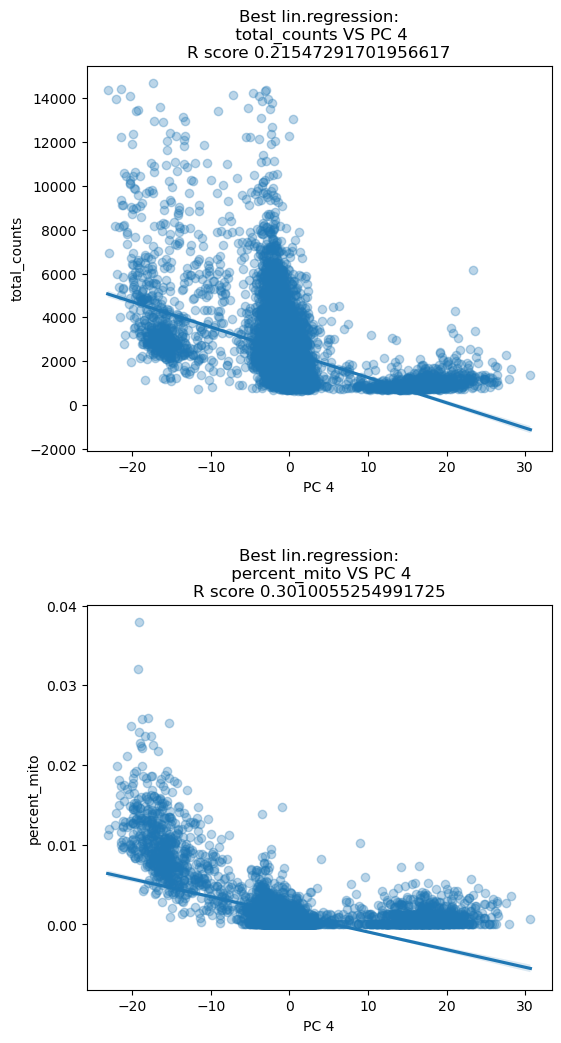

In [45]:
#PCA on normalized data
sc.preprocessing.pca(adata, svd_solver='arpack', random_state=12345)
#Calculating correlations
dependentFeatures(adata=adata, obs_subset=['total_counts','percent_mito'])

Now the correlation isn't strong.

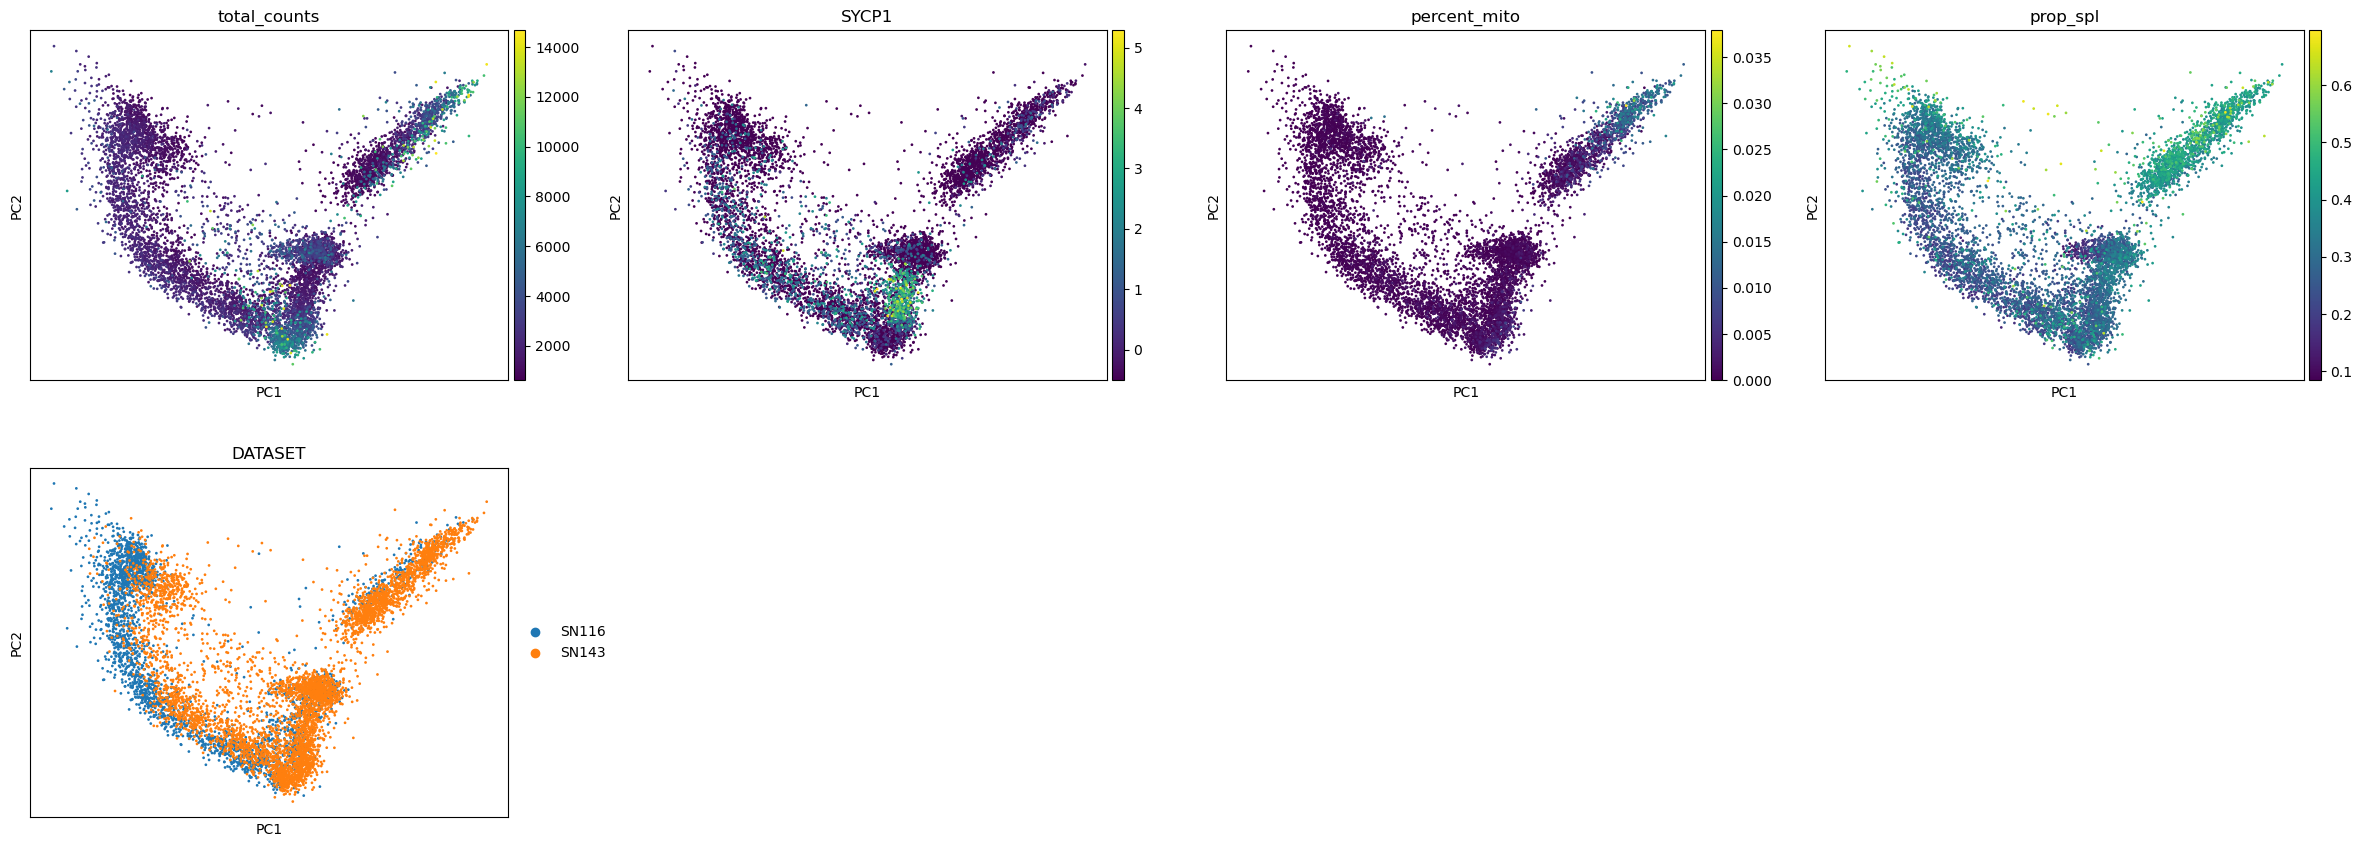

In [46]:
sc.pl.pca(adata, color=['total_counts', 'SYCP1', 'percent_mito', 'prop_spl', 'DATASET'])

Luckily the samples overlap, so they can be analyzed combined

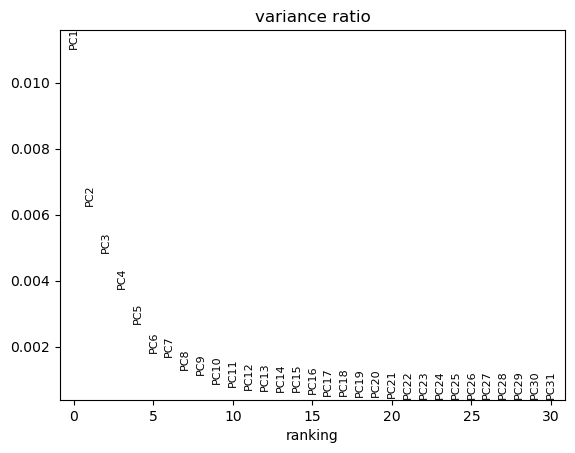

In [47]:
sc.plotting.pca_variance_ratio(adata) # small variance means it probably models noice in the data

Keep the PCs with the most variance, e.g. up to PC15

In [48]:
#sc.pp.neighbors(adata, n_pcs=15, random_state=12345) # use only for data with one single sample
bbknn.bbknn(adata, n_pcs=15)

In [49]:
sc.tools.umap(adata, random_state=54321)

In [50]:
#sc.tools.umap(adata, random_state=54321, n_components=3) # 3 components for 3D projection

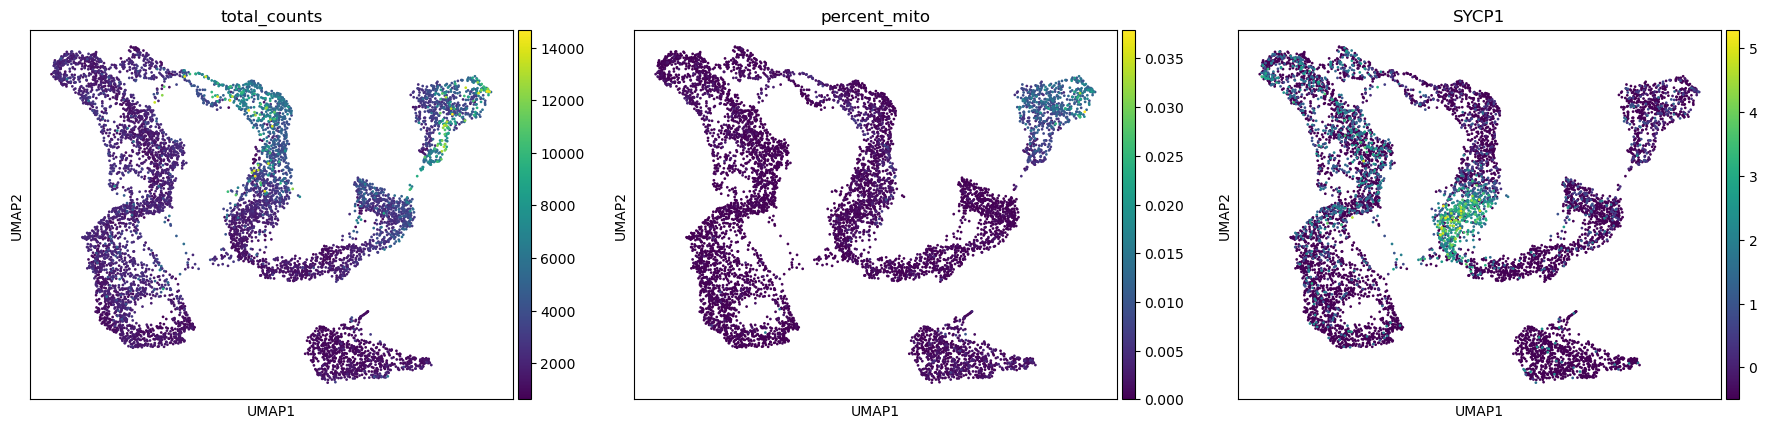

In [51]:
sc.plotting.umap(adata, color=['total_counts','percent_mito', 'SYCP1'])

In [52]:
#sc.plotting.umap(adata, color=['TNP2'], components=['1,2','1,3','2,3']) 

In [53]:
#sc.plotting.umap(adata, color=['TNP2'], projection='3d', components=['1,2,3'] 

In [55]:
adata

AnnData object with n_obs × n_vars = 7770 × 24717
    obs: 'DATASET', 'batch', 'total_counts', 'n_genes_by_counts', 'percent_mito', 'prop_unspl', 'prop_spl', 'perc_MALAT1', 'n_genes', 'doublet_scores', 'predicted_doublets', 'n_counts'
    var: 'gene_ids', 'feature_types', 'chromosome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'pca', 'log1p', 'hvg', 'DATASET_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'raw_counts', 'spliced', 'unspliced', 'scaled_counts'
    obsp: 'distances', 'connectivities'

In [56]:
markers = dict() #make an empty dictionary
### SPERMATOCYTOGENESIS
markers['SpermatogoniaA'] = ['ID4','HMGA1']
markers['SpermatogoniaB'] = ['MKI67','DMRT1','STRA8'] 
markers['SpermatocytesI'] = ['MEIOB','PRSS50','SYCP1','TEX101']
markers['SpermatocytesII'] = ['PIWIL1','ACRV1','SPATA16','CLGN']
### SPERMIOGENESIS
markers['Round.Spt'] = ['SPATA9','SPAM1'] #Round spermatids
markers['Elong.Spt'] = ['PRM1','PRM2'] #Elongated spermatids
### SOMATIC CELLS
markers['Sertoli'] = ['CTSL', 'VIM']
markers['Macroph'] = ['CD163','TYROBP']
markers['Leydig'] = ['CFD']
markers['Endothelial'] = ['CD34']
markers['Myoid'] = ['ACTA2']
markers['Pericyte'] = ['MYL9']

In [68]:
markers_scores, adata = marker_score(markers, adata)

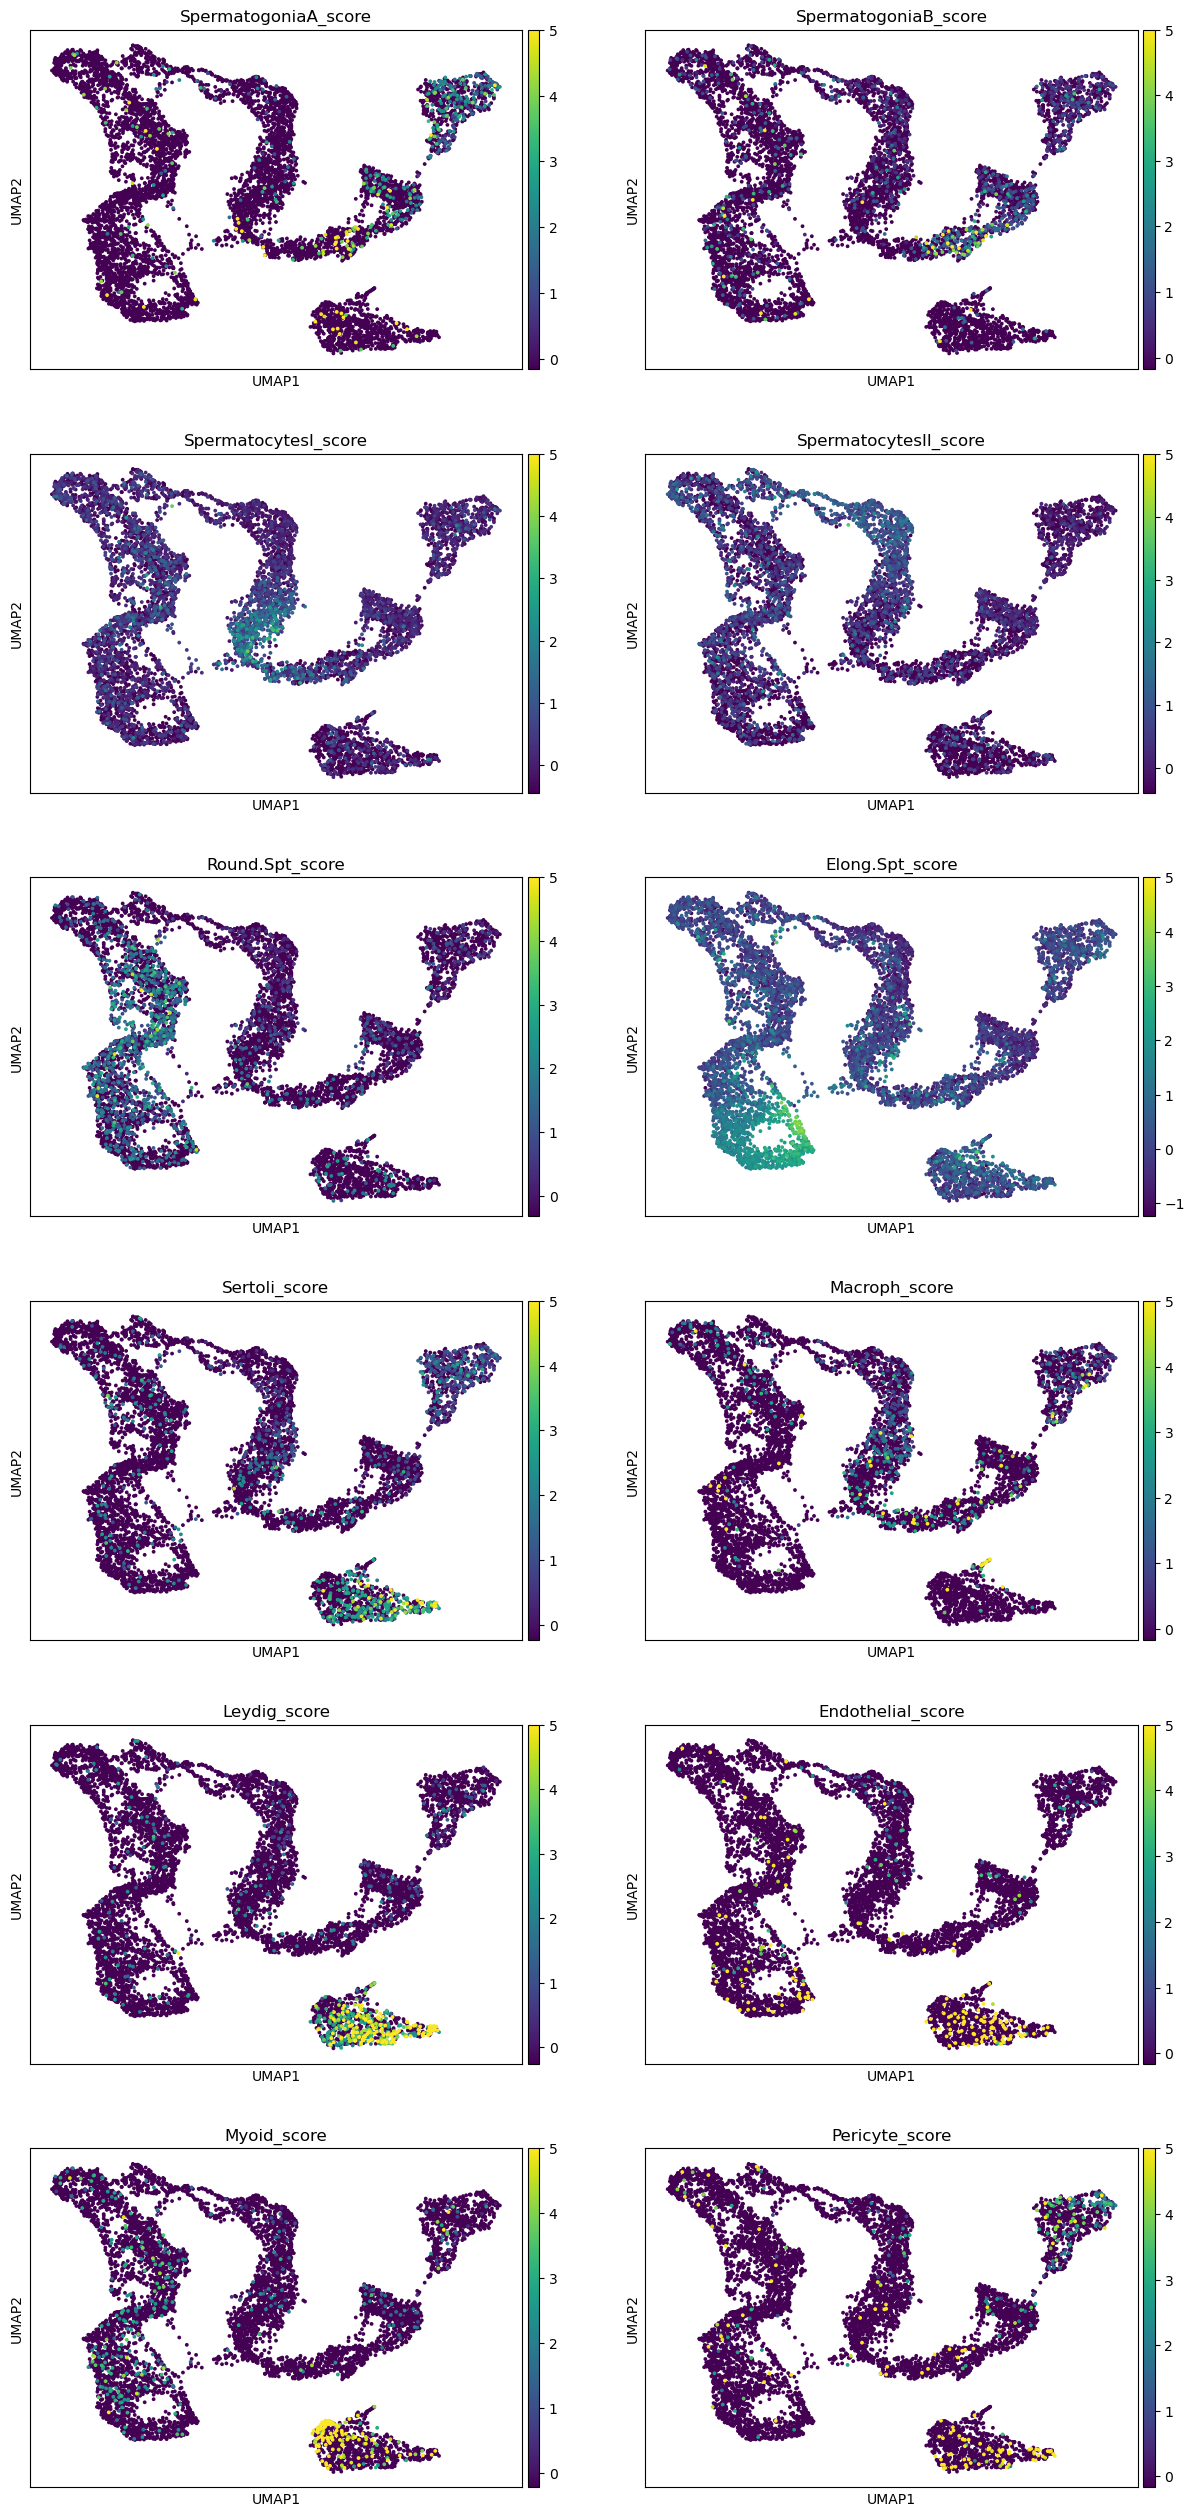

In [69]:
sc.plotting.umap(adata, color=markers_scores, components=['1,2'], ncols=2, vmax=5, s=30)

In [70]:
#leiden clustering at various resolutions
sc.tools.leiden(adata, resolution=1, random_state=12345, key_added='leiden_R1')
sc.tools.leiden(adata, resolution=0.5, random_state=12345, key_added='leiden_R.5')
sc.tools.leiden(adata, resolution=0.25, random_state=12345, key_added='leiden_R.25')
sc.tools.leiden(adata, resolution=0.1, random_state=12345, key_added='leiden_R.1')

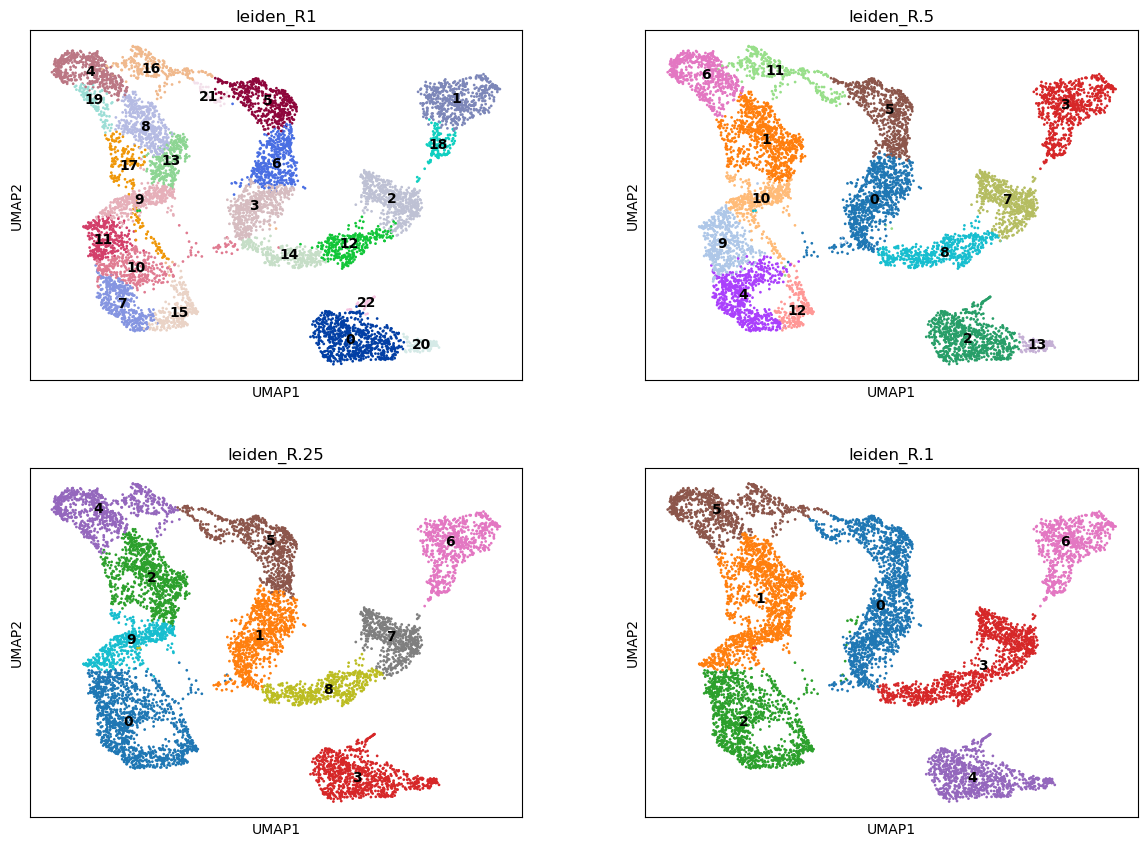

In [71]:
sc.plotting.umap(adata, color=['leiden_R1','leiden_R.5','leiden_R.25','leiden_R.1'], legend_loc='on data', ncols=2)

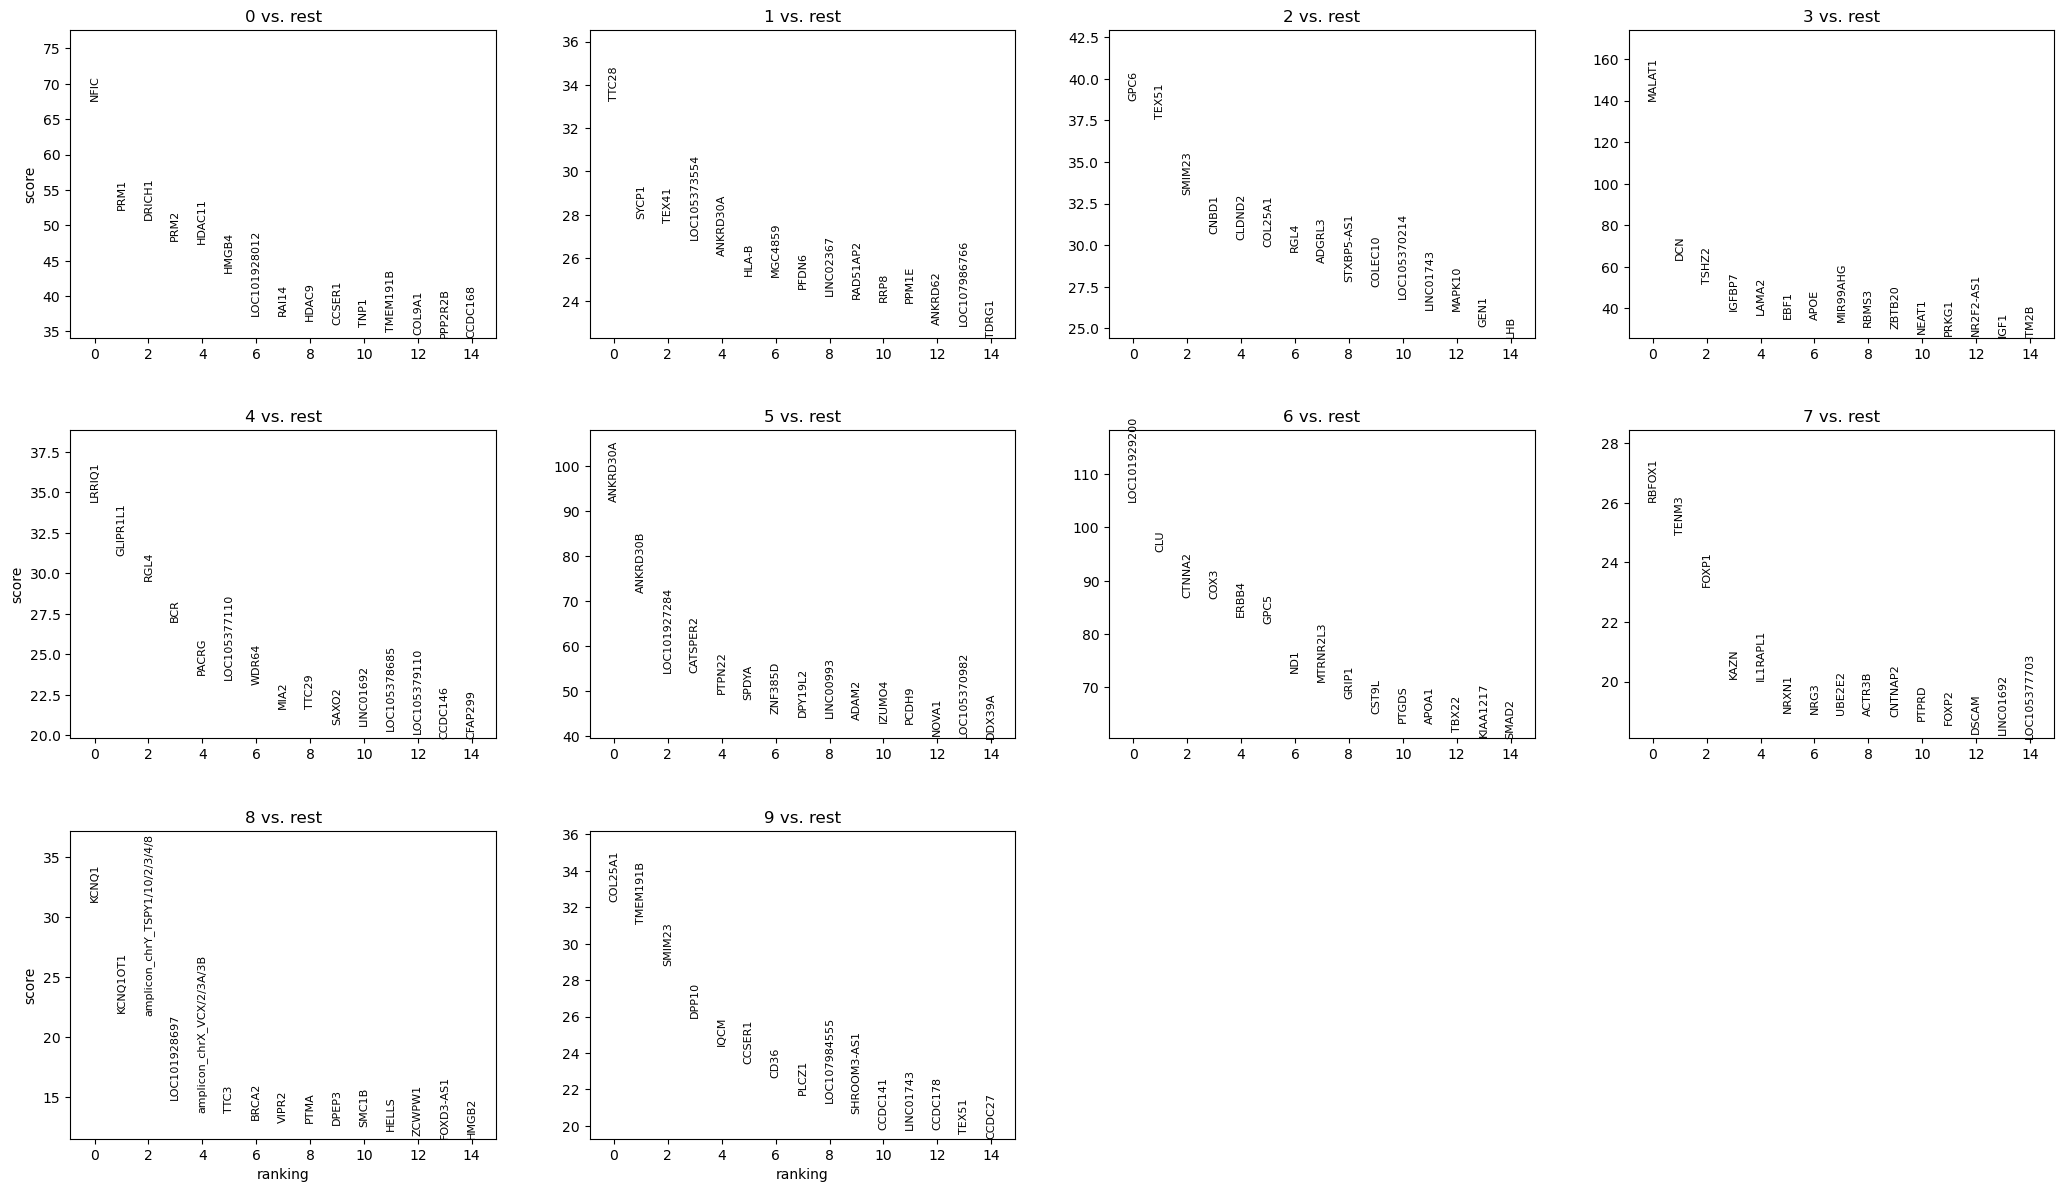

In [72]:
#Perform the test on logarithmized data (and not scaled) therefore starting with 'raw_counts' again
adata.X = adata.layers['raw_counts'] #raw data
sc.pp.normalize_per_cell(adata) #TPM normalization
sc.pp.log1p(adata) #logarithm
sc.tl.rank_genes_groups(adata, groupby='leiden_R.25', n_genes=50) #Top 50 diff.expressed genes in each cluster (t-test)
sc.pl.rank_genes_groups(adata, n_genes=15, sharey=False)

In [73]:
adata.X = adata.layers['scaled_counts'] #Set again the scaled data as standard data matrix

In [74]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
X = pd.DataFrame(
    {group + '_' + key[:1].upper(): result[key][group]
    for group in groups for key in ['names', 'pvals_adj','logfoldchanges']})
X.head() #print only first five lines

0_N            0_P       0_L           1_N            1_P       1_L  \
0    NFIC   0.000000e+00  3.770866         TTC28  3.148998e-163  1.904116   
1    PRM1   0.000000e+00  2.683595         SYCP1  1.987241e-121  2.859293   
2  DRICH1   0.000000e+00  2.882794         TEX41  1.623102e-120  2.747269   
3    PRM2  9.728165e-306  2.494651  LOC105373554  3.643604e-114  3.671795   
4  HDAC11  1.397803e-288  4.004494      ANKRD30A  3.285655e-114  1.769333   

      2_N            2_P       2_L     3_N  ...       6_L       7_N  \
0    GPC6  8.909512e-200  2.341300  MALAT1  ...  4.893624    RBFOX1   
1   TEX51  5.834915e-185  3.977174     DCN  ...  5.259974     TENM3   
2  SMIM23  5.603268e-158  2.859898   TSHZ2  ...  3.234508     FOXP1   
3   CNBD1  1.371957e-142  2.300458  IGFBP7  ...  4.828810      KAZN   
4  CLDND2  7.060010e-138  3.255175   LAMA2  ...  4.066847  IL1RAPL1   

             7_P       7_L                             8_N            8_P  \
0  9.792851e-103  1.319247                           KCNQ1  2.070138e-120   
1   7.692802e-97  1.273716                        KCNQ1OT1   1.888230e-74   
2   4.618367e-84  1.967516  amplicon_chrY_TSPY1/10/2/3/4/8   8.860624e-73   
3   1.188780e-68  1.187494                    LOC101928697   2.113671e-39   
4   5.943601e-68  1.424042       amplicon_chrX_VCX/2/3A/3B   5.262141e-35   

        8_L       9_N            9_P       9_L  
0  3.449039   COL25A1  1.909172e-128  2.370453  
1  3.120203  TMEM191B  4.093345e-122  2.577262  
2  4.792059    SMIM23  1.740112e-109  2.780332  
3  4.679963     DPP10   2.937836e-95  2.138323  
4  2.746992      IQCM   4.256892e-86  3.192838  

[5 rows x 30 columns]

In [75]:
X[ ['3_N'] ]

3_N
0      MALAT1
1         DCN
2       TSHZ2
3      IGFBP7
4       LAMA2
5        EBF1
6        APOE
7    MIR99AHG
8       RBMS3
9      ZBTB20
10      NEAT1
11      PRKG1
12  NR2F2-AS1
13       IGF1
14      ITM2B
15    RUNX1T1
16     IGFBP6
17   MIR100HG
18      LTBP4
19        GSN
20      GSTM5
21      NR2F2
22        B2M
23     FRMPD4
24       CST3
25     SPTBN1
26      PLPP3
27     LHFPL6
28        CFD
29     TMSB4X
30        MGP
31        C1S
32      LSAMP
33       ACTB
34      PTCH2
35   INS-IGF2
36      BICC1
37     COL1A2
38       IGF2
39     COL6A2
40      TIMP3
41     COL6A1
42      SMOC2
43       RORA
44      DDX17
45  LINC02456
46     ADGRB3
47       BNC2
48      FBLN5
49       NFIA

In [77]:
adata

AnnData object with n_obs × n_vars = 7770 × 24717
    obs: 'DATASET', 'batch', 'total_counts', 'n_genes_by_counts', 'percent_mito', 'prop_unspl', 'prop_spl', 'perc_MALAT1', 'n_genes', 'doublet_scores', 'predicted_doublets', 'n_counts', 'SpermatogoniaA_score', 'SpermatogoniaB_score', 'SpermatocytesI_score', 'SpermatocytesII_score', 'Round.Spt_score', 'Elong.Spt_score', 'Sertoli_score', 'Macroph_score', 'Leydig_score', 'Endothelial_score', 'Myoid_score', 'Pericyte_score', 'leiden_R1', 'leiden_R.5', 'leiden_R.25', 'leiden_R.1'
    var: 'gene_ids', 'feature_types', 'chromosome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'pca', 'log1p', 'hvg', 'DATASET_colors', 'neighbors', 'umap', 'leiden', 'rank_genes_groups', 'leiden_R1_colors', 'leiden_R.5_colors', 'leiden_R.25_colors', 'leiden_R.1_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'raw_counts', 'spliced', 'unspliced', 'scaled_counts'
    obsp: 'distances', 'connectivit

In [76]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head() # top 5 ranked genes for each cluster

0             1       2       3         4             5             6  \
0    NFIC         TTC28    GPC6  MALAT1    LRRIQ1      ANKRD30A  LOC101929200   
1    PRM1         SYCP1   TEX51     DCN  GLIPR1L1      ANKRD30B           CLU   
2  DRICH1         TEX41  SMIM23   TSHZ2      RGL4  LOC101927284        CTNNA2   
3    PRM2  LOC105373554   CNBD1  IGFBP7       BCR      CATSPER2          COX3   
4  HDAC11      ANKRD30A  CLDND2   LAMA2     PACRG        PTPN22         ERBB4   

          7                               8         9  
0    RBFOX1                           KCNQ1   COL25A1  
1     TENM3                        KCNQ1OT1  TMEM191B  
2     FOXP1  amplicon_chrY_TSPY1/10/2/3/4/8    SMIM23  
3      KAZN                    LOC101928697     DPP10  
4  IL1RAPL1       amplicon_chrX_VCX/2/3A/3B      IQCM

In [78]:
cd /home/astridkd/testis_singlecell/Workspaces/adahl/birc-project-akd/results

/faststorage/project/testis_singlecell/Workspaces/adahl/birc-project-akd/results


In [79]:
!mkdir -p cluster_results/MAC

In [80]:
# Save table of 
X.to_csv('cluster_results/MAC/expr_annotation.csv', sep=',', index=None)

In [ ]:
new_names = {
    '0':'SpermatogoniaA.1',
    '1':'SpermatogoniaA.2',
    '2':'Myoid',
    '3':'Endothelial',
    '4':'Leydig',
    '5':'SpermatogoniaB',
    '6':'Elong_Spermatids',
    '7':'SpermatocitesII.1',
    '8':'SpermatocitesII.2',
    '9':'Round_Spermatids',
    '10':'SpermatocitesI',
    '11':'Macroph',
    '12':'Pericytes'
}

We merge the clusters with same names. This cannot be done with a categorical object, where categories cannot have the same name. We convert the cluster names into a simple array to do this, and then reconvert it to a categorical object.

In [ ]:
adata.obs['spermatogenesis_types'] = rename_clusters(new_names, adata.obs['leiden_R.25']) #give clusters a cell type